<a href="https://colab.research.google.com/github/JotaDC/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##Leer y cargar datos en DataFrame

In [2]:
import pandas as pd
import numpy as np
url="datos_tratados.csv"
df=pd.read_csv(url)
df.head()


,id_cliente,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,...,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago,total_mensual,total_gastado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##🛠️ Preparación de los Datos

###Listar valores unicos por columna

In [3]:
#Listar valores unicos por columna
for col in df.columns:
   print(f"Valores unicos para la columna {col}:")
   print(df[col].unique())
   print("-"*80)

Valores unicos para la columna id_cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Valores unicos para la columna se_fue:
['No' 'Yes']
--------------------------------------------------------------------------------
Valores unicos para la columna genero:
['Female' 'Male']
--------------------------------------------------------------------------------
Valores unicos para la columna mayor_de_65:
[0 1]
--------------------------------------------------------------------------------
Valores unicos para la columna pareja:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna dependientes:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna meses_de_contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 

In [4]:
#Listar Nombres de las columnas
df.columns

Index(['id_cliente', 'se_fue', 'genero', 'mayor_de_65', 'pareja',
       'dependientes', 'meses_de_contrato', 'suscripcion_telefonia',
       'suscripcion_a_mas_de_una_linea_telefonica', 'suscripcion_internet',
       'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea',
       'suscripcion_proteccion_de_dispositivos', 'suscripcion_soporte_tecnico',
       'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas',
       'tipo_contrato', 'factura_online', 'forma_de_pago', 'total_mensual',
       'total_gastado', 'cuentas_diarias'],
      dtype='object')

### Eliminar Columna no relevante

In [5]:
# Crear copia del df original
df_limpio = df.copy()

# Eliminar Columna no relevante para el analisis
df_limpio = df_limpio.drop(columns=['id_cliente'])

### Agrupar Datos con "No interet service" y "No Phone service" como "No"

In [6]:
#Agrupar "No internet service" como "No"
columnas = [
    'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea', 'suscripcion_seguridad_en_linea', 'suscripcion_proteccion_de_dispositivos',
    'suscripcion_soporte_tecnico', 'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas'
]

for col in columnas:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

columnas= ['suscripcion_a_mas_de_una_linea_telefonica']

for col in columnas:
    df_limpio[col] = df_limpio[col].replace('No phone service', 'No')


### One-hot encoding con get_dummies

In [7]:

#One-hot encoding (sin dummy trap)
categorical_cols = [
       'se_fue', 'genero', 'mayor_de_65', 'pareja',
       'dependientes', 'suscripcion_telefonia',
       'suscripcion_a_mas_de_una_linea_telefonica', 'suscripcion_internet',
       'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea',
       'suscripcion_proteccion_de_dispositivos', 'suscripcion_soporte_tecnico',
       'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas',
       'tipo_contrato', 'factura_online', 'forma_de_pago'
]

df_encoded = pd.get_dummies(df_limpio, columns=categorical_cols, drop_first=True)

df_encoded

,meses_de_contrato,total_mensual,total_gastado,cuentas_diarias,se_fue_Yes,genero_Male,mayor_de_65_1,pareja_Yes,dependientes_Yes,suscripcion_telefonia_Yes,...,suscripcion_proteccion_de_dispositivos_Yes,suscripcion_soporte_tecnico_Yes,suscripicion_streaming_tv_Yes,suscripcion_streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,factura_online_Yes,forma_de_pago_Credit card (automatic),forma_de_pago_Electronic check,forma_de_pago_Mailed check
0,9,65.60,593.30,2.186667,False,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,9,59.90,542.40,1.996667,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,4,73.90,280.85,2.463333,True,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,13,98.00,1237.85,3.266667,True,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,3,83.90,267.40,2.796667,True,False,True,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,13,55.15,742.90,1.838333,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7028,22,85.10,1873.70,2.836667,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7029,2,50.30,92.75,1.676667,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7030,67,67.85,4627.65,2.261667,False,True,False,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   meses_de_contrato                              7032 non-null   int64  
 1   total_mensual                                  7032 non-null   float64
 2   total_gastado                                  7032 non-null   float64
 3   cuentas_diarias                                7032 non-null   float64
 4   se_fue_Yes                                     7032 non-null   bool   
 5   genero_Male                                    7032 non-null   bool   
 6   mayor_de_65_1                                  7032 non-null   bool   
 7   pareja_Yes                                     7032 non-null   bool   
 8   dependientes_Yes                               7032 non-null   bool   
 9   suscripcion_telefonia_Yes                      7032 

In [9]:
# Verifica si hay valores nulos
df_encoded.isnull().sum()

,0
meses_de_contrato,0
total_mensual,0
total_gastado,0
cuentas_diarias,0
se_fue_Yes,0
genero_Male,0
mayor_de_65_1,0
pareja_Yes,0
dependientes_Yes,0
suscripcion_telefonia_Yes,0


###Matriz de Correlación

In [64]:
corr = df_encoded.corr()
print(corr.head())

                   meses_de_contrato  total_mensual  total_gastado  \
meses_de_contrato           1.000000       0.246862       0.825880   
total_mensual               0.246862       1.000000       0.651065   
total_gastado               0.825880       0.651065       1.000000   
cuentas_diarias             0.246862       1.000000       0.651065   
se_fue_Yes                 -0.354049       0.192858      -0.199484   

                   cuentas_diarias  se_fue_Yes  genero_Male  mayor_de_65_1  \
meses_de_contrato         0.246862   -0.354049     0.005285       0.015683   
total_mensual             1.000000    0.192858    -0.013779       0.219874   
total_gastado             0.651065   -0.199484     0.000048       0.102411   
cuentas_diarias           1.000000    0.192858    -0.013779       0.219874   
se_fue_Yes                0.192858    1.000000    -0.008545       0.150541   

                   pareja_Yes  dependientes_Yes  suscripcion_telefonia_Yes  \
meses_de_contrato    0.381912   

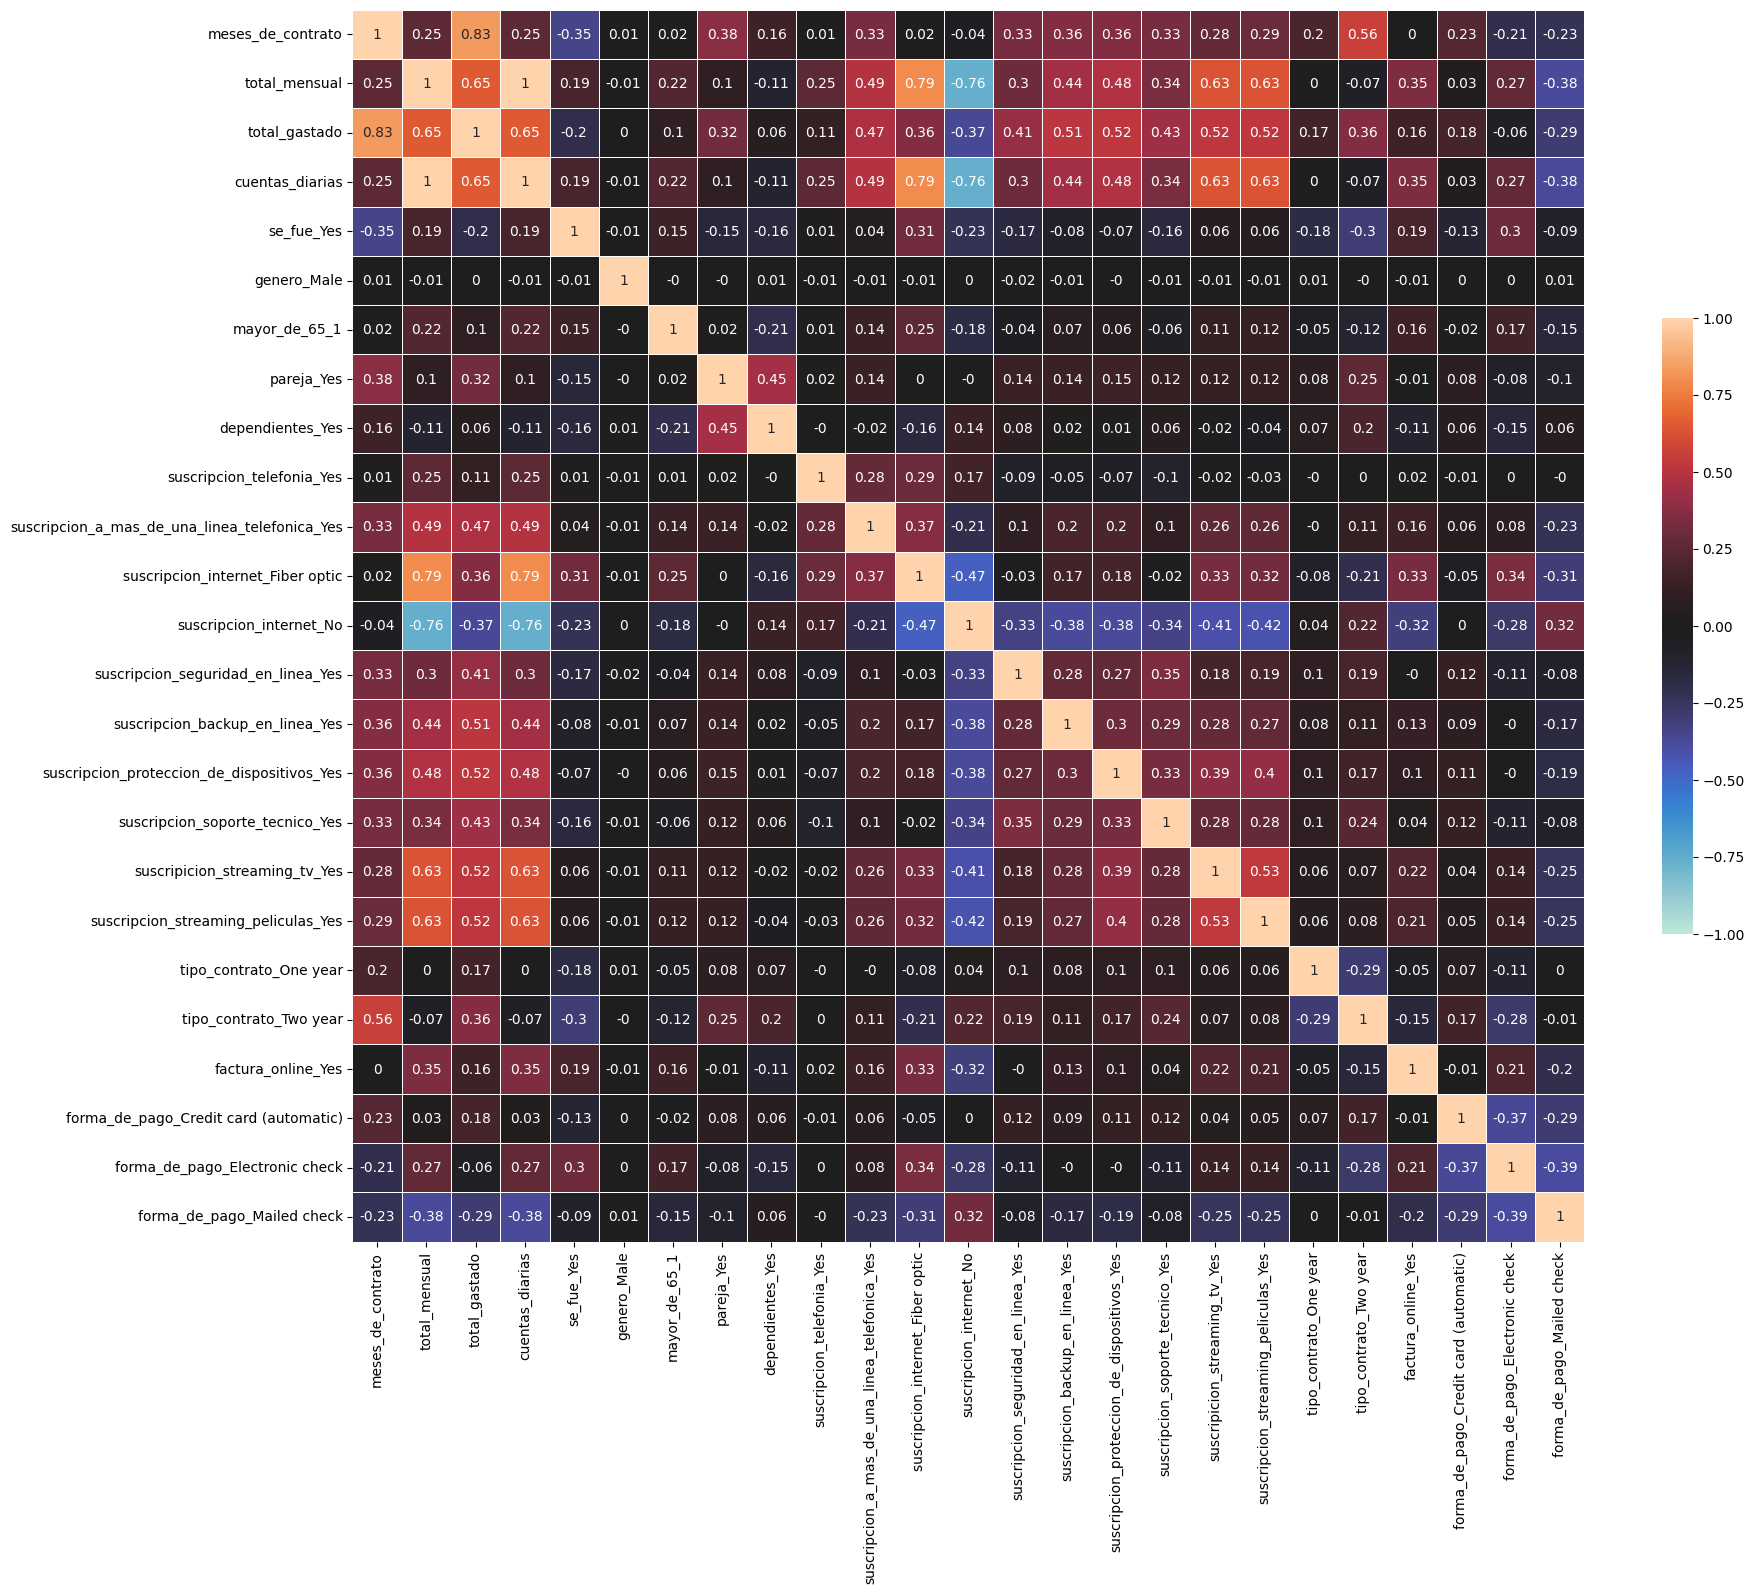

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

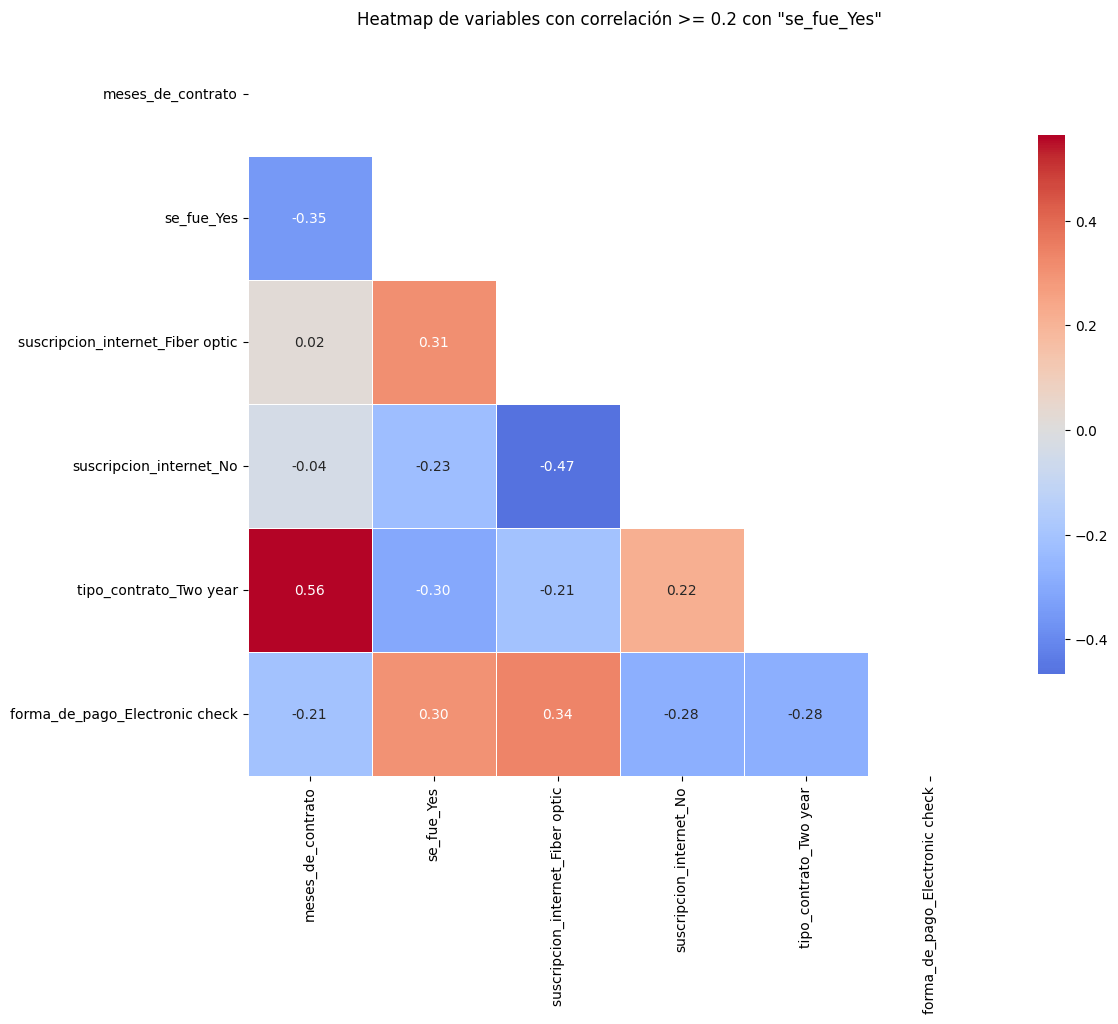

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'se_fue_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
umbral = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con "{target_var}"')
plt.show()



## 🔍 Análisis de Multicolinealidad

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [68]:
#Seleccionar las variables independientes
X = df_encoded.drop(columns=['se_fue_Yes'])

#Añadir constante (intercepto)
X_const = add_constant(X)

# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
2,total_mensual,inf
4,cuentas_diarias,inf
0,const,629.180624
11,suscripcion_internet_Fiber optic,148.500814
12,suscripcion_internet_No,104.213701
9,suscripcion_telefonia_Yes,34.893857
18,suscripcion_streaming_peliculas_Yes,24.156394
17,suscripicion_streaming_tv_Yes,24.080019
3,total_gastado,10.811490
1,meses_de_contrato,7.584453


### Eliminar columnas con mucha colinealidad

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "total_mensual",
    "cuentas_diarias"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)


# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,27.355204
2,total_gastado,10.781958
1,meses_de_contrato,7.572242
10,suscripcion_internet_No,2.752138
18,tipo_contrato_Two year,2.652316
9,suscripcion_internet_Fiber optic,2.398316
21,forma_de_pago_Electronic check,1.975991
22,forma_de_pago_Mailed check,1.856890
16,suscripcion_streaming_peliculas_Yes,1.738445
15,suscripicion_streaming_tv_Yes,1.723829


###Verificación de la Proporción de Cancelación (Churn)

In [99]:
df_encoded['se_fue_Yes'].value_counts(normalize=True)*100


,proportion
se_fue_Yes,
False,73.421502
True,26.578498


##🤖 Modelos Predictivos

In [92]:
#Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [94]:
#Separar features y target
X = df_encoded.drop(columns=['se_fue_Yes'])
y = df_encoded['se_fue_Yes']

In [95]:
#Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#### Normalizar y Balancear

In [107]:
from imblearn.under_sampling import RandomUnderSampler

#Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Balancear
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
#Normalizar
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#Balancear
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

####Regresión Logaritmica

In [108]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7360189573459716
ROC AUC: 0.8439968745289066
Matriz de Confusión:
 [[1104  445]
 [ 112  449]]
              precision    recall  f1-score   support

       False       0.91      0.71      0.80      1549
        True       0.50      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



####Random Forest

In [109]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Exactitud: 0.7369668246445498
ROC AUC: 0.8219459624920453
Matriz de Confusión:
 [[1119  430]
 [ 125  436]]
              precision    recall  f1-score   support

       False       0.90      0.72      0.80      1549
        True       0.50      0.78      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.74      0.75      2110



####Arbol de Decision

In [111]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar y entrenar
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Árbol de Decisión")
print("Exactitud:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Árbol de Decisión
Exactitud: 0.6521327014218009
ROC AUC: 0.6590417139917768
Matriz de Confusión:
 [[998 551]
 [183 378]]
              precision    recall  f1-score   support

       False       0.85      0.64      0.73      1549
        True       0.41      0.67      0.51       561

    accuracy                           0.65      2110
   macro avg       0.63      0.66      0.62      2110
weighted avg       0.73      0.65      0.67      2110



####Suport Vector Machine

In [112]:
from sklearn.svm import SVC

# Instanciar y entrenar
# Usamos probability=True para poder obtener predict_proba
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Support Vector Machine (SVM)")
print("Exactitud:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM)
Exactitud: 0.7355450236966825
ROC AUC: 0.8248228688740594
Matriz de Confusión:
 [[1107  442]
 [ 116  445]]
              precision    recall  f1-score   support

       False       0.91      0.71      0.80      1549
        True       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110



####Curva ROC

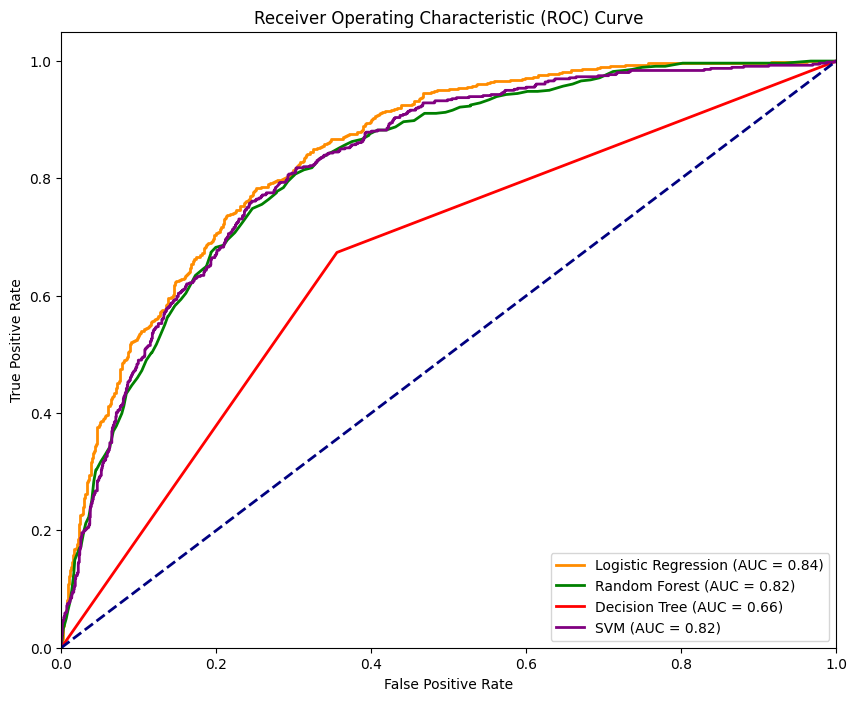

In [114]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar y entrenar
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("K-Nearest Neighbors (KNN)")
print("Exactitud:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN)
Exactitud: 0.6928909952606636
ROC AUC: 0.7771438994049407
Matriz de Confusión:
 [[1013  536]
 [ 112  449]]
              precision    recall  f1-score   support

       False       0.90      0.65      0.76      1549
        True       0.46      0.80      0.58       561

    accuracy                           0.69      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.78      0.69      0.71      2110



####Redes Neuronales

In [116]:
from sklearn.neural_network import MLPClassifier

# Instanciar y entrenar
mlp = MLPClassifier(random_state=42, max_iter=1000) # max_iter increased for convergence
mlp.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_mlp = mlp.predict(X_test_scaled)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Red Neuronal (MLP)")
print("Exactitud:", accuracy_score(y_test, y_pred_mlp))
print("ROC AUC:", roc_auc_score(y_test, y_prob_mlp))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Red Neuronal (MLP)
Exactitud: 0.6943127962085308
ROC AUC: 0.7716921618110241
Matriz de Confusión:
 [[1061  488]
 [ 157  404]]
              precision    recall  f1-score   support

       False       0.87      0.68      0.77      1549
        True       0.45      0.72      0.56       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110



####Curva ROC de los 6 modelos

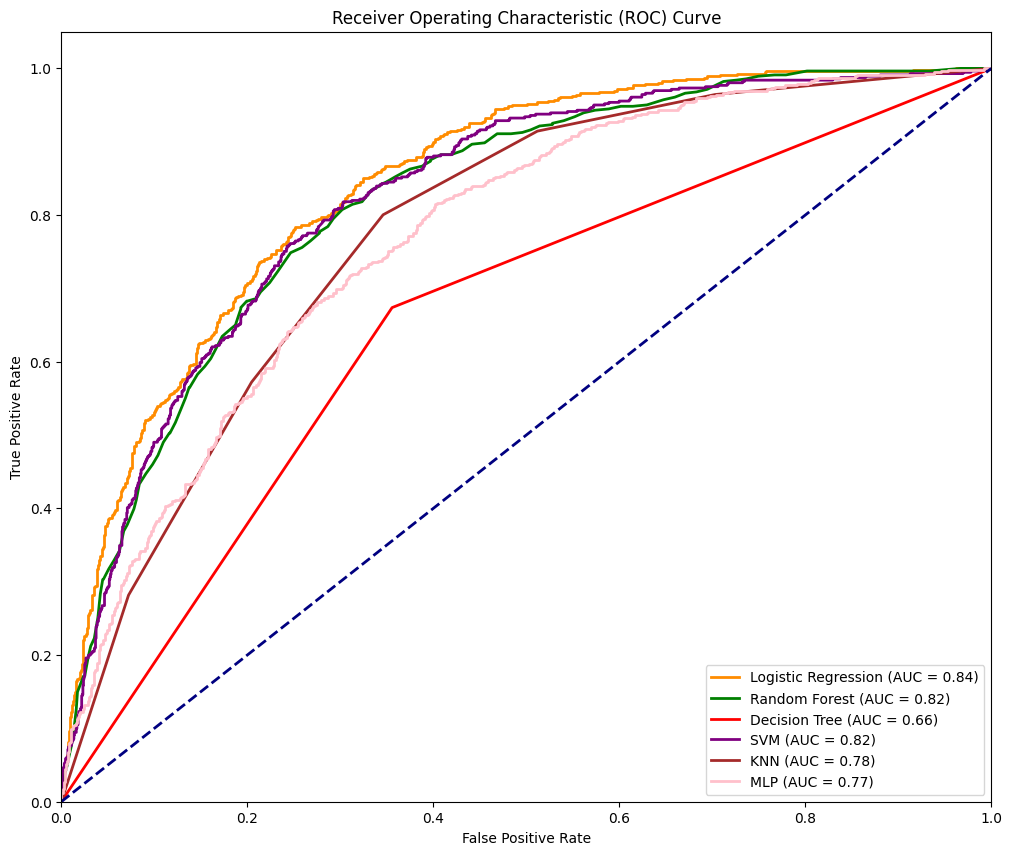

In [117]:
# Calculate ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate ROC curve for MLP
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.figure(figsize=(12, 10))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='brown', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, color='pink', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

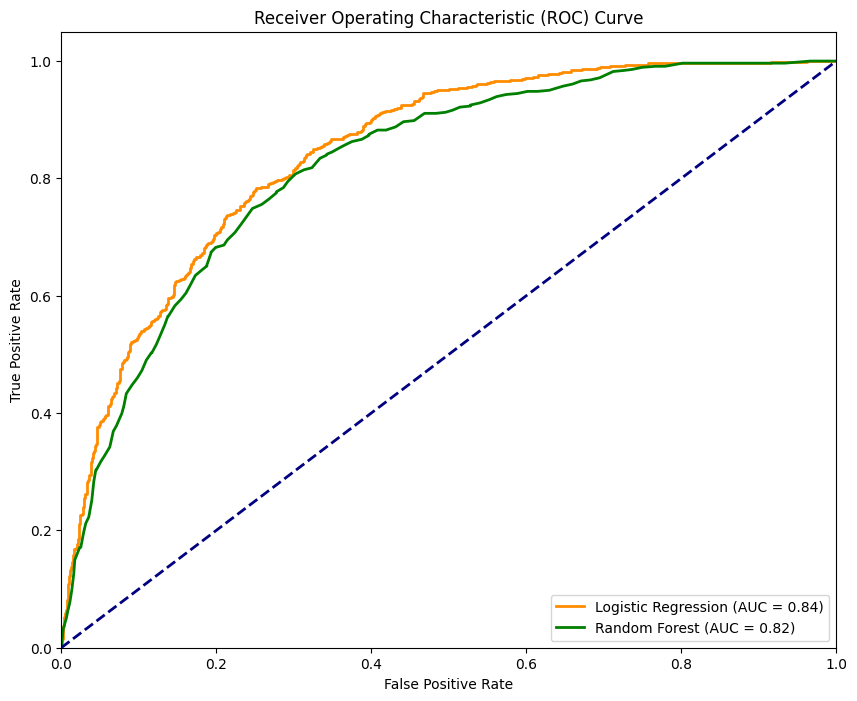

In [113]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()